# Word Embeddings: A Comprehensive Guide

## Table of Contents

1. Introduction to Word Embeddings  
2. Why Word Embeddings?  
3. Traditional Approaches vs Word Embeddings  
4. Types of Word Embeddings  
5. Word2Vec Deep Dive  
6. GloVe (Global Vectors)  
7. FastText  
8. Implementing Word Embeddings  
9. Evaluating Word Embeddings  
10. Applications and Use Cases  
11. Advanced Topics  
12. Hands-on Exercises

## Introduction to Word Embeddings

Word embeddings are a type of word representation that allows words to be represented as vectors in a continuous vector space. Unlike traditional one-hot encoding, which represents words as sparse vectors, word embeddings capture semantic relationships between words by placing similar words closer together in the vector space.

These embeddings are learned from large text corpora and are widely used in natural language processing (NLP) tasks such as text classification, sentiment analysis, and machine translation. Popular word embedding techniques include Word2Vec, GloVe, and FastText.

By using word embeddings, machine learning models can better understand the context and meaning of words, leading to improved performance on various NLP tasks.

In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec, KeyedVectors
import nltk
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
# 'punkt' is a pre-trained model in NLTK used for tokenizing text into sentences or words.
# It provides the data required for nltk.tokenize.word_tokenize() and nltk.tokenize.sent_tokenize().
nltk.download('punkt')
# Download the NLTK averaged_perceptron_tagger model, which is required for part-of-speech tagging.
# This model enables functions like nltk.pos_tag() to assign POS tags to tokens.
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pruthvirajv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pruthvirajv/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Word embeddings are dense vector representations of words that capture semantic and syntactic relationships between words in a continuous vector space.

One-Hot Encoding:
cat: [1, 0, 0, 0, 0]
dog: [0, 1, 0, 0, 0]
animal: [0, 0, 1, 0, 0]
pet: [0, 0, 0, 1, 0]
car: [0, 0, 0, 0, 1]

Word Embeddings (2D):
cat: [0.2, 0.8]
dog: [0.3, 0.7]
animal: [0.25, 0.75]
pet: [0.28, 0.76]
car: [0.9, 0.1]


Text(0.5, 1.0, 'Word Embeddings Visualization')

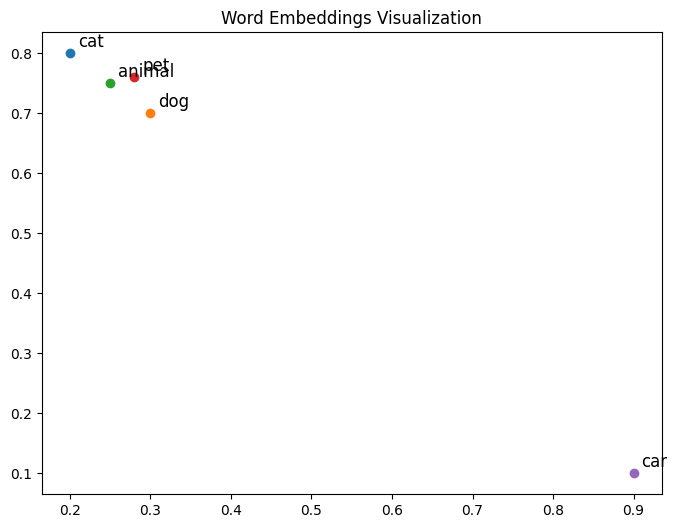

In [14]:
# Simple visualization of word embedding concept
# Traditional One-Hot Encoding vs Word Embeddings

vocabulary = ['cat', 'dog', 'animal', 'pet', 'car']

# One-hot encoding
# One-hot encoding is a way of representing categorical variables (such as words) as binary vectors.
# Each word in the vocabulary is represented by a vector where only one element is '1' (indicating the presence of that word), and all other elements are '0'.
# This results in high-dimensional, sparse vectors that do not capture any semantic similarity between words.
one_hot = {
    'cat':    [1, 0, 0, 0, 0],
    'dog':    [0, 1, 0, 0, 0],
    'animal': [0, 0, 1, 0, 0],
    'pet':    [0, 0, 0, 1, 0],
    'car':    [0, 0, 0, 0, 1]
}

# Hypothetical word embeddings (2D for visualization)
embeddings = {
    'cat':    [0.2, 0.8],
    'dog':    [0.3, 0.7],
    'animal': [0.25, 0.75],
    'pet':    [0.28, 0.76],
    'car':    [0.9, 0.1]
}

print("One-Hot Encoding:")
for word, vec in one_hot.items():
    print(f"{word}: {vec}")

print("\nWord Embeddings (2D):")
for word, vec in embeddings.items():
    print(f"{word}: {vec}")

# Plotting the embeddings
plt.figure(figsize=(8, 6))
for word, vec in embeddings.items():
    plt.scatter(vec[0], vec[1])
    plt.text(vec[0]+0.01, vec[1]+0.01, word, fontsize=12)
plt.title("Word Embeddings Visualization")


## 2. Why Word Embeddings?

### Problems with Traditional Approaches

Traditional approaches like one-hot encoding represent words as high-dimensional, sparse vectors where each word is independent and equidistant from others. This method fails to capture semantic relationships between words, making it difficult for models to understand context or similarity. As a result, tasks such as measuring word similarity or analogy become challenging, and the representation does not scale well with large vocabularies.

Word embeddings address these limitations by representing words as dense, low-dimensional vectors that encode semantic and syntactic relationships, allowing models to better understand language and context.


In [ ]:
# The L2 norm (also known as the Euclidean norm) of a vector is a measure of its length (magnitude) in Euclidean space.
# It is calculated as the square root of the sum of the squared vector elements.
# For a vector v = [v1, v2, ..., vn], the L2 norm is sqrt(v1^2 + v2^2 + ... + vn^2).

# Cosine similarity is a measure of similarity between two non-zero vectors.
# It calculates the cosine of the angle between the vectors, giving a value between -1 and 1.
# A value of 1 means the vectors are identical in direction, 0 means they are orthogonal (no similarity), and -1 means they are diametrically opposed.
# In the context of word embeddings, cosine similarity is commonly used to measure how similar two word vectors are in the embedding space.


def calculate_similarity(vec1, vec2):
    """Calculate cosine similarity between two vectors"""
    dot_product = np.dot(vec1, vec2)           # Compute the dot product of the two vectors
    norm_a = np.linalg.norm(vec1)              # Compute the L2 norm (magnitude) of the first vector
    norm_b = np.linalg.norm(vec2)              # Compute the L2 norm (magnitude) of the second vector
    return dot_product / (norm_a * norm_b)     # Return the cosine similarity (dot product divided by product of norms)

# One-hot similarity
print("One-Hot Encoding Similarities:")
print(f"Similarity(cat, dog): {calculate_similarity(one_hot['cat'], one_hot['dog'])}")
print(f"Similarity(cat, pet): {calculate_similarity(one_hot['cat'], one_hot['pet'])}")

# Embedding similarity
print("\nWord Embedding Similarities:")
print(f"Similarity(cat, dog): {calculate_similarity(embeddings['cat'], embeddings['dog']):.2f}")
print(f"Similarity(cat, pet): {calculate_similarity(embeddings['cat'], embeddings['pet']):.2f}")
print(f"Similarity(cat, car): {calculate_similarity(embeddings['cat'], embeddings['car']):.2f}")

One-Hot Encoding Similarities:
Similarity(cat, dog): 0.0
Similarity(cat, pet): 0.0

Word Embedding Similarities:
Similarity(cat, dog): 0.99
Similarity(cat, pet): 0.99
Similarity(cat, car): 0.35



### Advantages of Word Embeddings

- **Dimensionality Reduction:** Transform sparse, high-dimensional representations into dense, low-dimensional vectors.
- **Semantic Relationships:** Capture semantic similarity—similar words have similar vector representations.
- **Mathematical Operations:** Enable meaningful vector arithmetic (e.g., "king" - "man" + "woman" ≈ "queen").
- **Transfer Learning:** Allow the use of pre-trained embeddings across different NLP tasks, improving performance and reducing training time.


## 3. Traditional Approaches vs Word Embeddings

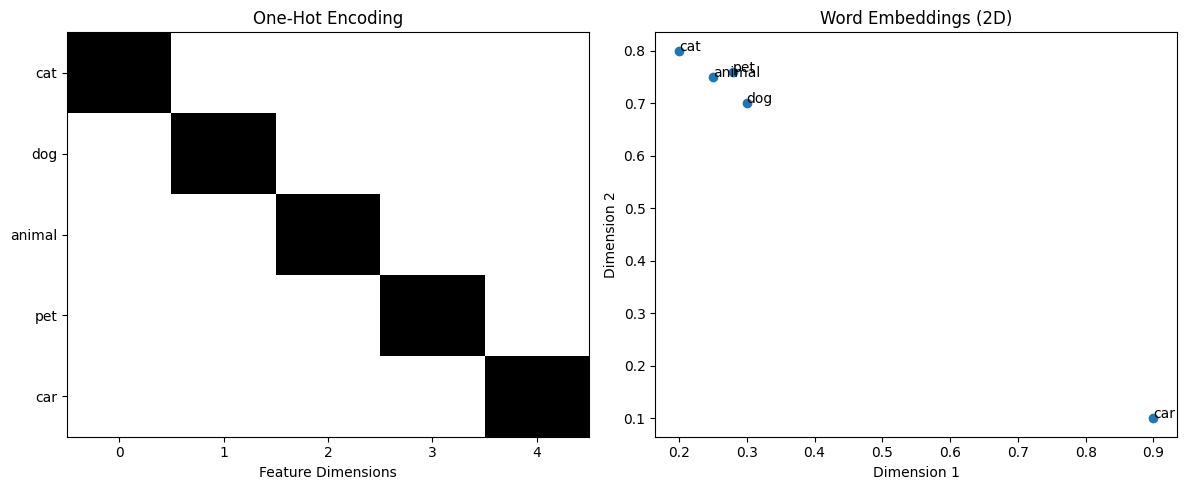

In [16]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# One-hot visualization
axes[0].imshow(list(one_hot.values()), cmap='binary', aspect='auto')
axes[0].set_yticks(range(len(vocabulary)))
axes[0].set_yticklabels(vocabulary)
axes[0].set_title('One-Hot Encoding')
axes[0].set_xlabel('Feature Dimensions')

# Embedding visualization
axes[1].scatter(*zip(*embeddings.values()))
for word, (x, y) in embeddings.items():
    axes[1].annotate(word, (x, y))
axes[1].set_title('Word Embeddings (2D)')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()

## 4. Types of Word Embeddings

**Frequency-based:**
- Count Vector
- TF-IDF
- Co-occurrence Matrix

**Prediction-based:**
- Word2Vec (CBOW, Skip-gram)
- FastText
- GloVe

**Contextual:**
- ELMo
- BERT
- GPT
- RoBERTa

## 5. Word2Vec Deep Dive

**Word2Vec** is a popular prediction-based word embedding technique with two main architectures:

- **CBOW (Continuous Bag of Words):** Predicts the target word based on its surrounding context words.
- **Skip-gram:** Predicts the surrounding context words given a target word.

Both architectures learn word representations that capture semantic relationships by leveraging large text corpora.

In [25]:

# Sample corpus
corpus = [
    "the cat sat on the mat",
    "the dog played in the park",
    "cats and dogs are pets",
    "the cat and dog are friends",
    "animals need food and water"
]

# The corpus is a collection of example sentences used to train the Word2Vec models.
# Training on this corpus allows the models to learn word relationships and generate vector representations for each word based on their context.

# Tokenize
tokenized_corpus = [sentence.split() for sentence in corpus]

# Train Word2Vec model
model_cbow = Word2Vec(
    tokenized_corpus,      # List of tokenized sentences (corpus)
    vector_size=50,        # Dimensionality of the word vectors
    window=3,              # Maximum distance between the current and predicted word within a sentence
    min_count=1,           # Ignores all words with total frequency lower than this
    sg=0,                  # Training algorithm: 0 for CBOW, 1 for Skip-gram
    epochs=100             # Number of iterations (epochs) over the corpus
)

model_skipgram = Word2Vec(
    tokenized_corpus,      # List of tokenized sentences (corpus)
    vector_size=50,        # Dimensionality of the word vectors
    window=3,              # Maximum distance between the current and predicted word within a sentence
    min_count=1,           # Ignores all words with total frequency lower than this
    sg=1,                  # Training algorithm: 0 for CBOW, 1 for Skip-gram
    epochs=100             # Number of iterations (epochs) over the corpus
)

# Get word vectors
word = 'cat'
vector_cbow = model_cbow.wv[word]
vector_skipgram = model_skipgram.wv[word]

print(f"CBOW vector for '{word}' (first 10 dimensions):")
print(vector_cbow[:10])
print(f"\nSkip-gram vector for '{word}' (first 10 dimensions):")
print(vector_skipgram[:10])

CBOW vector for 'cat' (first 10 dimensions):
[-0.01734416  0.0072155   0.01023568  0.01167333  0.01485409 -0.01243847
  0.00245041  0.01235767 -0.00597952 -0.01242316]

Skip-gram vector for 'cat' (first 10 dimensions):
[-0.0174201   0.00720078  0.01028644  0.01176958  0.01486053 -0.0124971
  0.00246213  0.01238158 -0.00601684 -0.012473  ]


Word2Vec models can be pre-trained or trained from scratch. When you provide a vector of sentences (a corpus), you are training a new Word2Vec model on your specific data. This allows the model to learn word relationships and context relevant to your domain or dataset.

Pre-trained Word2Vec models (like Google News vectors) are trained on large, general corpora and can be used directly if they fit your needs. However, training on your own sentences helps the model capture domain-specific meanings and vocabulary that may not be present in general pre-trained models.

In summary:
- **Provide sentences:** To train a custom Word2Vec model for your data.
- **Use pre-trained model:** If you want general-purpose embeddings without additional training.

**Can i use word2vec to print the vector of the cat without training as above**
No, you cannot obtain the vector for "cat" using Word2Vec without either training a model on your own corpus or loading a pre-trained model that already contains the word "cat". Word2Vec requires a trained model to generate word vectors. If you do not train on your data, you must load a pre-trained model (such as Google News vectors) and then access the vector for "cat" if it exists in the vocabulary.

In [21]:

# Find similar words
print("Most similar to 'cat' (CBOW):")
for word, similarity in model_cbow.wv.most_similar('cat', topn=3):
    print(f"  {word}: {similarity:.3f}")

# Word arithmetic (if we had a larger corpus)
# Example: king - man + woman = queen
# This would work better with pre-trained embeddings

Most similar to 'cat' (CBOW):
  cats: 0.204
  dog: 0.173
  park: 0.165




## 6. GloVe (Global Vectors)
Understanding GloVe
GloVe combines the advantages of global matrix factorization and local context window methods.

In [22]:

def load_glove_embeddings(file_path):
    """
    Load GloVe embeddings from file
    Download from: https://nlp.stanford.edu/projects/glove/
    """
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Example usage (requires downloaded GloVe file)
# glove_embeddings = load_glove_embeddings('glove.6B.100d.txt')


## 7. FastText
Subword Information
FastText extends Word2Vec by using character n-grams

In [ ]:
# Cell 10: Custom embedding layer implementation
class SimpleEmbedding:
    def __init__(self, vocab_size, embedding_dim):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        # Initialize with random weights
        self.embedding_matrix = np.random.randn(vocab_size, embedding_dim) * 0.01
        
    def get_embedding(self, word_idx):
        return self.embedding_matrix[word_idx]
    
    def update_embedding(self, word_idx, gradient, learning_rate=0.01):
        self.embedding_matrix[word_idx] -= learning_rate * gradient

# Create vocabulary mapping
vocab = {word: idx for idx, word in enumerate(set(' '.join(corpus).split()))}
embedding_layer = SimpleEmbedding(len(vocab), 10)

# Get embedding for a word
word_embedding = embedding_layer.get_embedding(vocab['cat'])
print(f"Embedding for 'cat': {word_embedding}")

## 8. Implementing Word Embeddings
Building a Simple Embedding Layer

In [ ]:

class SimpleEmbedding:
    def __init__(self, vocab_size, embedding_dim):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        # Initialize with random weights
        # Initialize the embedding matrix with small random values.
        # Multiplying by 0.01 ensures the initial weights are close to zero, which helps with stable and efficient training.
        self.embedding_matrix = np.random.randn(vocab_size, embedding_dim) * 0.01
        
    def get_embedding(self, word_idx):
        return self.embedding_matrix[word_idx]
    
    def update_embedding(self, word_idx, gradient, learning_rate=0.01):
        self.embedding_matrix[word_idx] -= learning_rate * gradient

# Corpus
print("Corpus:")
for sentence in corpus:
    print(f" - {sentence}")

# Tokenize
tokenized_corpus = set(' '.join(corpus).split())
print("Tokenized Corpus:")
for tokens in tokenized_corpus:
    print(f" - {tokens}")

# Create vocabulary mapping
vocab = {word: idx for idx, word in enumerate(set(' '.join(corpus).split()))}
print("Vocabulary mapping:", vocab )
embedding_layer = SimpleEmbedding(len(vocab), 10)

# Get embedding for a word
word_embedding = embedding_layer.get_embedding(vocab['cat'])
print(f"Embedding for 'cat': {word_embedding}")

Corpus:
 - the cat sat on the mat
 - the dog played in the park
 - cats and dogs are pets
 - the cat and dog are friends
 - animals need food and water
Tokenized Corpus:
 - park
 - played
 - and
 - mat
 - the
 - water
 - dogs
 - in
 - cat
 - dog
 - pets
 - need
 - cats
 - animals
 - food
 - sat
 - are
 - friends
 - on
Vocabulary mapping: {'park': 0, 'played': 1, 'and': 2, 'mat': 3, 'the': 4, 'water': 5, 'dogs': 6, 'in': 7, 'cat': 8, 'dog': 9, 'pets': 10, 'need': 11, 'cats': 12, 'animals': 13, 'food': 14, 'sat': 15, 'are': 16, 'friends': 17, 'on': 18}
Embedding for 'cat': [-0.00263489 -0.0002818   0.00554726 -0.00159802 -0.00580368  0.01027889
 -0.01418332 -0.01388923  0.00897119  0.01810448]


## 9. Evaluating Word Embeddings
Intrinsic Evaluation

In [23]:
# Cell 11: Evaluation metrics
def evaluate_word_similarity(model, word_pairs):
    """Evaluate embeddings using word similarity tasks"""
    correlations = []
    for word1, word2, human_score in word_pairs:
        if word1 in model.wv and word2 in model.wv:
            model_score = model.wv.similarity(word1, word2)
            correlations.append((human_score, model_score))
    return correlations

# Example word pairs with human similarity scores (0-1)
test_pairs = [
    ('cat', 'dog', 0.8),
    ('cat', 'pet', 0.7),
    ('cat', 'the', 0.1),
]

# Evaluate (would need more data for meaningful results)
# correlations = evaluate_word_similarity(model_cbow, test_pairs)

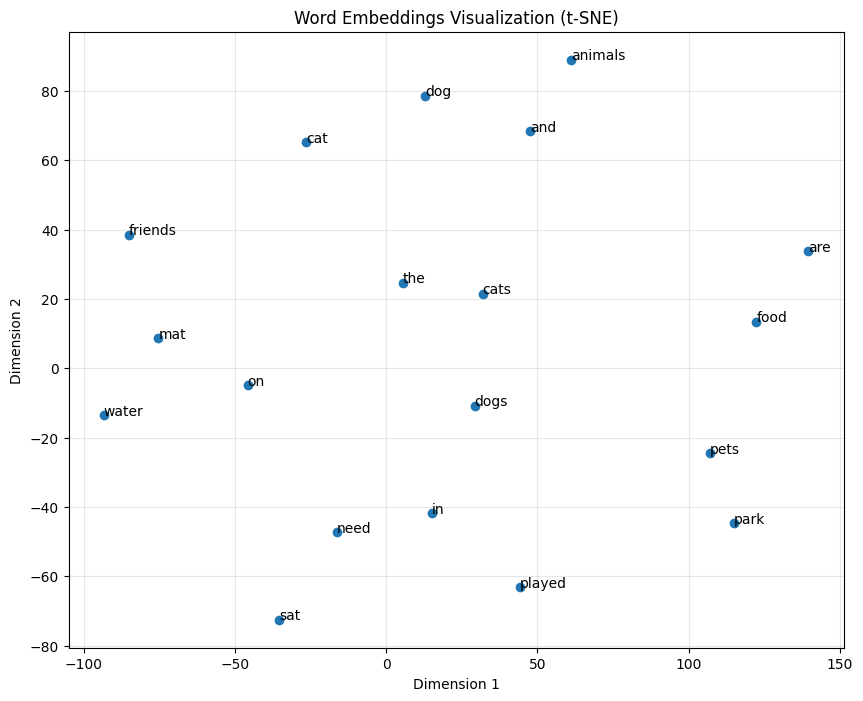

In [29]:
# Visualizing word embeddings using t-SNE
def plot_embeddings(model, words=None):
    if words is None:
        words = list(model.wv.index_to_key)[:20]  # Plot first 20 words
    
    word_vectors = np.array([model.wv[word] for word in words if word in model.wv])
    
    # Reduce dimensions using t-SNE
    # t-SNE (t-distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique.
    # It is particularly well-suited for visualizing high-dimensional data by mapping it to 2 or 3 dimensions.
    # t-SNE preserves the local structure of the data, making it useful for visualizing word embeddings.
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    embeddings_2d = tsne.fit_transform(word_vectors)
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
    
    for i, word in enumerate(words):
        if word in model.wv:
            plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]))
    
    plt.title('Word Embeddings Visualization (t-SNE)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_embeddings(model_cbow)